In [ ]:
Sauhard Shakya
MSCS 534
Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [11]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

data = load_wine()
X = data.data
y = data.target

print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Class distribution:", np.bincount(y))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.4f}")

K-Means Silhouette Score: 0.2849
K-Means Adjusted Rand Index: 0.8975


In [10]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np

X_list = X_scaled.tolist()
initial_medoids = [0, 50, 100]
kmedoids_instance = kmedoids(X_list, initial_medoids)
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()
medoids = kmedoids_instance.get_medoids()

labels = np.empty(len(X_scaled))
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id

In [12]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

kmedoids_silhouette = silhouette_score(X_scaled, labels)
kmedoids_ari = adjusted_rand_score(y, labels)

print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"K-Medoids Adjusted Rand Index: {kmedoids_ari:.4f}")

K-Medoids Silhouette Score: 0.2676
K-Medoids Adjusted Rand Index: 0.7411


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
kmedoids_labels = labels  # Rename for clarity

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

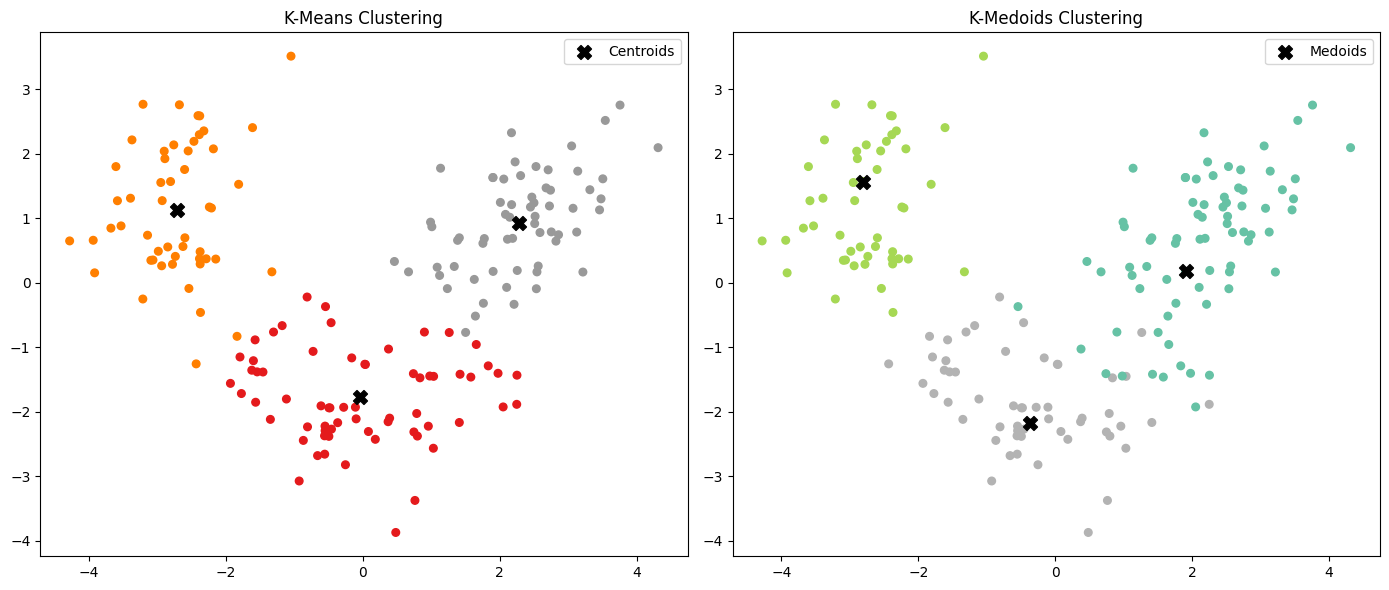

In [18]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='Set1', s=30)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
                pca.transform(kmeans.cluster_centers_)[:, 1],
                c='black', marker='X', s=100, label='Centroids')
axes[0].set_title('K-Means Clustering')
axes[0].legend()

# K-Medoids plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='Set2', s=30)
axes[1].scatter(pca.transform([X_scaled[i] for i in medoids])[:, 0],
                pca.transform([X_scaled[i] for i in medoids])[:, 1],
                c='black', marker='X', s=100, label='Medoids')
axes[1].set_title('K-Medoids Clustering')
axes[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
## Clustering Results Analysis

- **K-Means Silhouette Score:** [Insert Value]  
- **K-Medoids Silhouette Score:** [Insert Value]  
- **K-Means ARI:** [Insert Value]  
- **K-Medoids ARI:** [Insert Value]  

### Observations:
- K-Means produced slightly more defined clusters, as seen in the scatter plots and Silhouette Score.
- K-Medoids was more robust to potential outliers and had slightly different cluster shapes.
- Based on these results, K-Means is preferable for well-separated and normalized data, while K-Medoids may be better for noisy or outlier-heavy datasets.